In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
hierarchies = pd.read_excel('data/IHME_GBD_2019_A1_HIERARCHIES_Y2020M10D15.XLSX', sheet_name='Cause Hierarchy')
hierarchies

,Cause ID,Cause Name,Parent ID,Parent Name,Level,Cause Outline,Sort Order,YLL Only,YLD Only
0,294,All causes,294,All causes,0,Total,1.0,NaN,NaN
1,295,"Communicable, maternal, neonatal, and nutritio...",294,All causes,1,A,2.0,NaN,NaN
2,955,HIV/AIDS and sexually transmitted infections,295,"Communicable, maternal, neonatal, and nutritio...",2,A.1,3.0,NaN,NaN
3,298,HIV/AIDS,955,HIV/AIDS and sexually transmitted infections,3,A.1.1,4.0,NaN,NaN
4,948,HIV/AIDS - Drug-susceptible Tuberculosis,298,HIV/AIDS,4,A.1.1.1,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
355,726,Physical violence by sharp object,724,Interpersonal violence,4,C.3.2.2,352.0,NaN,NaN
356,941,Sexual violence,724,Interpersonal violence,4,C.3.2.3,353.0,NaN,X
357,727,Physical violence by other means,724,Interpersonal violence,4,C.3.2.4,354.0,NaN,NaN
358,945,Conflict and terrorism,717,Self-harm and interpersonal violence,3,C.3.3,355.0,NaN,NaN


In [209]:
locations = pd.read_excel('data/IHME_GBD_2019_A1_HIERARCHIES_Y2020M10D15.XLSX', sheet_name='GBD 2019 Locations Hierarchy')
loc_levels = []
for l in [1,2,3]:
    locs = locations[locations['Level']==l].rename(columns={
        'Location ID': f'ID_{l}','Parent ID': f'ID_{l-1}',
        'Location Name': f'location_{l}'
    }).drop(columns=['Sort Order','Location Set Version ID','Level'])
    loc_levels.append(locs)
    
gbd_regions = loc_levels[2].merge(loc_levels[1]).merge(loc_levels[0])
gbd_regions = gbd_regions.drop(columns=['ID_0','ID_1','ID_2','ID_3']).rename(columns={
    'location_3': 'country',
    'location_2': 'region',
    'location_1': 'super-region'
})
gbd_regions

,country,region,super-region
0,Armenia,Central Asia,"Central Europe, Eastern Europe, and Central Asia"
1,Azerbaijan,Central Asia,"Central Europe, Eastern Europe, and Central Asia"
2,Georgia,Central Asia,"Central Europe, Eastern Europe, and Central Asia"
3,Kazakhstan,Central Asia,"Central Europe, Eastern Europe, and Central Asia"
4,Kyrgyzstan,Central Asia,"Central Europe, Eastern Europe, and Central Asia"
...,...,...,...
199,Nigeria,Western Sub-Saharan Africa,Sub-Saharan Africa
200,Sao Tome and Principe,Western Sub-Saharan Africa,Sub-Saharan Africa
201,Senegal,Western Sub-Saharan Africa,Sub-Saharan Africa
202,Sierra Leone,Western Sub-Saharan Africa,Sub-Saharan Africa


In [70]:
hierarchies[hierarchies['Level']==1]

,Cause ID,Cause Name,Parent ID,Parent Name,Level,Cause Outline,Sort Order,YLL Only,YLD Only
1,295,"Communicable, maternal, neonatal, and nutritio...",294,All causes,1,A,2.0,NaN,NaN
95,409,Non-communicable diseases,294,All causes,1,B,96.0,NaN,NaN
319,687,Injuries,294,All causes,1,C,316.0,NaN,NaN


In [71]:
df = pd.read_csv('data/IHME-GBD_2019_DATA-adce95f9-1.csv')
df.head()

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,1,Deaths,34,Azerbaijan,3,Both,22,All ages,558,Mental disorders,1,Number,1990,0.076348,0.133717,0.028903
1,1,Deaths,145,Kuwait,3,Both,22,All ages,641,Congenital birth defects,1,Number,1990,322.472734,380.403117,258.552293
2,1,Deaths,145,Kuwait,3,Both,22,All ages,956,Respiratory infections and tuberculosis,1,Number,1990,224.573964,244.411679,205.859066
3,1,Deaths,129,Honduras,3,Both,22,All ages,687,Injuries,1,Number,1990,4154.189518,4662.678097,3669.959297
4,1,Deaths,177,Djibouti,3,Both,22,All ages,558,Mental disorders,1,Number,1990,0.002432,0.012447,0.000341


In [176]:
df = pd.read_excel('data/GBD/IHME_GBD_2021_MORTALITY_1990_2021_SR_TABLE_1_Y2024M04D03.XLSX', skiprows=1)
df = df.rename(columns={'2021 (All-Age Deaths)':'mortality'})[['location_type', 'location_name','cause_name','mortality']]
df

,location_type,location_name,cause_name,mortality
0,Global,Global,Acute glomerulonephritis,10774.8 (7601.7-13803.0)
1,Global,Global,Acute hepatitis A,26916.3 (18069.6-44051.3)
2,Global,Global,Acute hepatitis B,36058.3 (26541.3-45730.2)
3,Global,Global,Acute hepatitis C,5462.1 (2373.0-9232.2)
4,Global,Global,Acute hepatitis E,3445.7 (1730.5-5904.5)
...,...,...,...,...
125575,Country,Togo,Vascular intestinal disorders,41.7 (28.6-59.3)
125576,Country,Togo,Venomous animal contact,97.5 (55.0-152.7)
125577,Country,Togo,Visceral leishmaniasis,0.0 (0.0-0.0)
125578,Country,Togo,Yellow fever,7.7 (1.4-23.3)


In [177]:
df['mortality'] = df['mortality'].apply(lambda x: x.split()[0]).astype('float')

df

,location_type,location_name,cause_name,mortality
0,Global,Global,Acute glomerulonephritis,10774.8
1,Global,Global,Acute hepatitis A,26916.3
2,Global,Global,Acute hepatitis B,36058.3
3,Global,Global,Acute hepatitis C,5462.1
4,Global,Global,Acute hepatitis E,3445.7
...,...,...,...,...
125575,Country,Togo,Vascular intestinal disorders,41.7
125576,Country,Togo,Venomous animal contact,97.5
125577,Country,Togo,Visceral leishmaniasis,0.0
125578,Country,Togo,Yellow fever,7.7


In [178]:
df[df['location_name']=='Global']['mortality'].sum()

67876378.8

In [179]:
df.cause_name.unique()

array(['Acute glomerulonephritis', 'Acute hepatitis A',
       'Acute hepatitis B', 'Acute hepatitis C', 'Acute hepatitis E',
       'Acute lymphoid leukemia', 'Acute myeloid leukemia',
       'Adverse effects of medical treatment', 'African trypanosomiasis',
       'Alcohol use disorders', 'Alcoholic cardiomyopathy',
       "Alzheimer's disease and other dementias",
       'Amphetamine use disorders', 'Anorexia nervosa', 'Aortic aneurysm',
       'Appendicitis', 'Asbestosis', 'Ascariasis', 'Asthma',
       'Atrial fibrillation and flutter', 'Bladder cancer',
       'Brain and central nervous system cancer', 'Breast cancer',
       'Burkitt lymphoma', 'COVID-19', 'Cellulitis', 'Cervical cancer',
       'Chagas disease', 'Chlamydial infection',
       'Chronic hepatitis B including cirrhosis',
       'Chronic hepatitis C including cirrhosis',
       'Chronic kidney disease due to diabetes mellitus type 1',
       'Chronic kidney disease due to diabetes mellitus type 2',
       'Chronic 

In [180]:
hierarchy

,Cause ID,Cause Name,Parent ID,Parent Name,Level,Cause Outline,Sort Order,YLL Only,YLD Only
0,294,All causes,294,All causes,0,Total,1,NaN,NaN
1,295,"Communicable, maternal, neonatal, and nutritio...",294,All causes,1,A,2,NaN,NaN
2,955,HIV/AIDS and sexually transmitted infections,295,"Communicable, maternal, neonatal, and nutritio...",2,A.1,3,NaN,NaN
3,298,HIV/AIDS,955,HIV/AIDS and sexually transmitted infections,3,A.1.1,4,NaN,NaN
4,948,HIV/AIDS - Drug-susceptible Tuberculosis,298,HIV/AIDS,4,A.1.1.1,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...
372,1029,Total cancers,294,All causes,1,E,373,NaN,NaN
373,1026,Total burden related to hepatitis B,294,All causes,1,F,374,NaN,NaN
374,1027,Total burden related to hepatitis C,294,All causes,1,G,375,NaN,NaN
375,1028,Total burden related to Non-alcoholic fatty li...,294,All causes,1,H,376,NaN,NaN


In [193]:
hierarchy = pd.read_excel('data/GBD/GBD_2021_CAUSE_HIERARCHY_Y2024M05D16.xlsx')
hierarchy

loc_levels = []
for l in [0,1,2,3,4]:
    locs = hierarchy[hierarchy['Level']==l].rename(columns={
        'Cause ID': f'ID_{l}','Parent ID': f'ID_{l-1}',
        'Cause Name': f'cause{l}', #'Parent Name': f'Parent_{l-1}',
    }).drop(columns=['Sort Order','YLL Only','YLD Only','Level','Parent Name'],)
    if l!=4:
        locs = locs.drop(columns='Cause Outline')
    loc_levels.append(locs)
    
gbd_causes = loc_levels[4].merge(loc_levels[3],how='outer').merge(loc_levels[2],how='outer').merge(loc_levels[1]).merge(loc_levels[0])
gbd_causes


,ID_4,cause4,ID_3,Cause Outline,cause3,ID_2,cause2,ID_1,cause1,ID_0,cause0,ID_-1
0,NaN,NaN,345,NaN,Malaria,344,Neglected tropical diseases and malaria,295,"Communicable, maternal, neonatal, and nutritio...",294,All causes,294
1,NaN,NaN,346,NaN,Chagas disease,344,Neglected tropical diseases and malaria,295,"Communicable, maternal, neonatal, and nutritio...",294,All causes,294
2,348.0,Visceral leishmaniasis,347,A.4.3.1,Leishmaniasis,344,Neglected tropical diseases and malaria,295,"Communicable, maternal, neonatal, and nutritio...",294,All causes,294
3,349.0,Cutaneous and mucocutaneous leishmaniasis,347,A.4.3.2,Leishmaniasis,344,Neglected tropical diseases and malaria,295,"Communicable, maternal, neonatal, and nutritio...",294,All causes,294
4,NaN,NaN,350,NaN,African trypanosomiasis,344,Neglected tropical diseases and malaria,295,"Communicable, maternal, neonatal, and nutritio...",294,All causes,294
...,...,...,...,...,...,...,...,...,...,...,...,...
297,997.0,Chronic kidney disease due to diabetes mellitu...,589,B.8.2.1,Chronic kidney disease,974,Diabetes and kidney diseases,409,Non-communicable diseases,294,All causes,294
298,998.0,Chronic kidney disease due to diabetes mellitu...,589,B.8.2.2,Chronic kidney disease,974,Diabetes and kidney diseases,409,Non-communicable diseases,294,All causes,294
299,591.0,Chronic kidney disease due to hypertension,589,B.8.2.3,Chronic kidney disease,974,Diabetes and kidney diseases,409,Non-communicable diseases,294,All causes,294
300,592.0,Chronic kidney disease due to glomerulonephritis,589,B.8.2.4,Chronic kidney disease,974,Diabetes and kidney diseases,409,Non-communicable diseases,294,All causes,294


In [194]:
causes = df.cause_name.unique()
print(len(causes))
for l in [4,3,2,1,0]:
    print(f'Level {l}') 
    print(sum(gbd_causes[f'cause{l}'].isin(causes)))

230
Level 4
124
Level 3
99
Level 2
0
Level 1
0
Level 0
0


In [211]:
df_causes = pd.concat([
    df.merge(gbd_causes, left_on='cause_name', right_on='cause4',how='inner'),
    df.merge(gbd_causes, left_on='cause_name', right_on='cause3',how='inner'),
]).merge(gbd_regions,left_on='location_name', right_on='country')
df_causes

,location_type,location_name,cause_name,mortality,ID_4,cause4,ID_3,Cause Outline,cause3,ID_2,cause2,ID_1,cause1,ID_0,cause0,ID_-1,country,region,super-region
0,Country,Armenia,Acute hepatitis A,0.1,401.0,Acute hepatitis A,400,A.5.8.1,Acute hepatitis,961,Other infectious diseases,295,"Communicable, maternal, neonatal, and nutritio...",294,All causes,294,Armenia,Central Asia,"Central Europe, Eastern Europe, and Central Asia"
1,Country,Armenia,Acute hepatitis B,0.8,402.0,Acute hepatitis B,400,A.5.8.2,Acute hepatitis,961,Other infectious diseases,295,"Communicable, maternal, neonatal, and nutritio...",294,All causes,294,Armenia,Central Asia,"Central Europe, Eastern Europe, and Central Asia"
2,Country,Armenia,Acute hepatitis C,0.1,403.0,Acute hepatitis C,400,A.5.8.3,Acute hepatitis,961,Other infectious diseases,295,"Communicable, maternal, neonatal, and nutritio...",294,All causes,294,Armenia,Central Asia,"Central Europe, Eastern Europe, and Central Asia"
3,Country,Armenia,Acute hepatitis E,0.0,404.0,Acute hepatitis E,400,A.5.8.4,Acute hepatitis,961,Other infectious diseases,295,"Communicable, maternal, neonatal, and nutritio...",294,All causes,294,Armenia,Central Asia,"Central Europe, Eastern Europe, and Central Asia"
4,Country,Armenia,Acute lymphoid leukemia,26.4,845.0,Acute lymphoid leukemia,487,B.1.32.1,Leukemia,410,Neoplasms,409,Non-communicable diseases,294,All causes,294,Armenia,Central Asia,"Central Europe, Eastern Europe, and Central Asia"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45487,Country,Togo,Uterine cancer,48.6,NaN,NaN,435,NaN,Uterine cancer,410,Neoplasms,409,Non-communicable diseases,294,All causes,294,Togo,Western Sub-Saharan Africa,Sub-Saharan Africa
45488,Country,Togo,Varicella and herpes zoster,25.4,NaN,NaN,342,NaN,Varicella and herpes zoster,961,Other infectious diseases,295,"Communicable, maternal, neonatal, and nutritio...",294,All causes,294,Togo,Western Sub-Saharan Africa,Sub-Saharan Africa
45489,Country,Togo,Vascular intestinal disorders,41.7,NaN,NaN,533,NaN,Vascular intestinal disorders,526,Digestive diseases,409,Non-communicable diseases,294,All causes,294,Togo,Western Sub-Saharan Africa,Sub-Saharan Africa
45490,Country,Togo,Yellow fever,7.7,NaN,NaN,358,NaN,Yellow fever,344,Neglected tropical diseases and malaria,295,"Communicable, maternal, neonatal, and nutritio...",294,All causes,294,Togo,Western Sub-Saharan Africa,Sub-Saharan Africa


super-region
Central Europe, Eastern Europe, and Central Asia     5710183.3
High-income                                         10674511.3
Latin America and Caribbean                          4697068.6
North Africa and Middle East                         3141475.9
South Asia                                          13941457.3
Southeast Asia, East Asia, and Oceania              17328253.0
Sub-Saharan Africa                                   8810960.8
Name: mortality, dtype: float64

In [164]:
#df = df.merge(gbd_causes, left_on='cause_name', right_on='cause4',how='left')


In [199]:
for l in [4,3,2,1,0]:
    print(df_causes[df_causes['location_name']=='Global'].groupby(f'cause{l}')['mortality'].sum())

cause4
Acute hepatitis A                  26916.3
Acute hepatitis B                  36058.3
Acute hepatitis C                   5462.1
Acute hepatitis E                   3445.7
Acute lymphoid leukemia            71184.0
                                    ...   
Urogenital congenital anomalies     7527.1
Urolithiasis                       17686.3
Uterine fibroids                    2077.5
Venomous animal contact            79375.5
Visceral leishmaniasis              5502.1
Name: mortality, Length: 124, dtype: float64
cause3
Acute glomerulonephritis                 10774.8
Acute hepatitis                          71882.4
Adverse effects of medical treatment    122302.0
African trypanosomiasis                   1056.9
Alcohol use disorders                   158558.6
                                          ...   
Uterine cancer                           97670.7
Varicella and herpes zoster              13947.7
Vascular intestinal disorders            91518.7
Yellow fever               

In [304]:
# import zipfile
# import os

# unpack_zips = True

# if unpack_zips:
#     for f in os.listdir('data/GBD'):
#         if '.csv' in f:
#             os.remove(f'data/GBD/{f}')
#     f = os.listdir('data/GBD')[0]
#     df = pd.DataFrame()
#     for f in os.listdir('data/GBD'):
#         if '.zip' in f:
#             with zipfile.ZipFile(f'data/GBD/{f}', 'r') as zip_ref:
#                 zip_ref.extractall('data/GBD/')
#         elif '.csv' in f:
#             df = pd.concat([df, pd.read_csv(f'data/GBD/{f}')])
#     for f in os.listdir('data/GBD'):
#         if '.csv' in f:
#             df = pd.concat([df, pd.read_csv(f'data/GBD/{f}')])
#     df = df[(df['metric_id']==1)]
#     df.to_csv('data/IHME-GBD_2019_DATA.csv', index=False)
#     for f in os.listdir('data/GBD'):
#         if '.csv' in f:
#             os.remove(f'data/GBD/{f}')
# df.head()
    
    

In [275]:
afdf = pd.read_csv('data/attributable_fractions.csv')

afdf['region'] = (afdf['region']
                  .str.replace('&','and').str.replace('ope and','ope, and')
                  .str.replace('South-East','Southeast').str.replace('Asia and','Asia, and')
                  .str.replace('High Income','High-income')
                 )
afdf_long = (afdf
        .melt(id_vars=['cause','region','measure'],value_name='AF')
            )
afdf = (afdf_long
        .pivot(columns=['region'],values='AF',index=['cause','measure','variable'])
        .reset_index()
       )
afdf.to_csv('data/attributable_fractions_empty.csv',index=False)


In [340]:
afdl_mort=afdf_long[
    (afdf_long['cause']=='all') & 
    (afdf_long['measure']=='mortality') & 
    (afdf_long['variable']=='heat exposure')
]

mortality_regions = (df_causes[(df_causes['cause0']=='All causes')]
           .groupby('super-region')['mortality'].sum()
           .to_frame('mortality').reset_index()
                    )

af_mort = mortality_regions.merge(afdl_mort, left_on='super-region',right_on='region').drop(columns='region')
af_mort['climate mortality'] = af_mort['mortality'] * af_mort['AF']*0.01
af_mort

,super-region,mortality,cause,measure,variable,AF,climate mortality
0,"Central Europe, Eastern Europe, and Central Asia",5710183.3,all,mortality,heat exposure,0.70,39971.28310
1,High-income,10674511.3,all,mortality,heat exposure,0.57,60844.71441
2,Latin America and Caribbean,4697068.6,all,mortality,heat exposure,1.53,71865.14958
3,North Africa and Middle East,3141475.9,all,mortality,heat exposure,0.42,13194.19878
4,South Asia,13941457.3,all,mortality,heat exposure,0.52,72495.57796
5,"Southeast Asia, East Asia, and Oceania",17328253.0,all,mortality,heat exposure,2.82,488656.73460
6,Sub-Saharan Africa,8810960.8,all,mortality,heat exposure,NaN,NaN


In [281]:
sdf = pd.read_feather('data/attributable_df.feather')
impacts = [x for x in sdf.columns if '3 - ' in x]
impacts

['3 - 2.01. Food security',
 '3 - 2.02. Mental health and sentiment',
 '3 - 2.03. Cardiorespiratory disease',
 '3 - 2.04. Direct injury and death',
 '3 - 2.05. Infectious diseases',
 '3 - 2.06. Other health impacts',
 '3 - 2.07. Water security',
 '3 - 2.08. Mortality and morbidity',
 '3 - 2.09. Health system capacity']

In [283]:
sdf

,id,title,abstract,publication_year,0 - relevant,2 - 1.02. Changes in temperature,2 - 1.03. Seasonal change,2 - 1.04. Changes in precipitation,2 - 1.06. Climate change (unspecified),2 - 1.07. Other meteorological variables,...,5 - 4.02. Heatwaves,5 - 4.03. Wildfires,5 - 4.04. Other extreme events,5 - 4.05. Extreme cold,6 - 5.01. Pollution,6 - 5.03. Reduced agricultural & aquaculture productivity,6 - 5.04. Reduced labour and physical capacity,temp_da_simplified,precip_da_simplified,attributable
0,W2129447349,Apparent Temperature and Cause-Specific Mortal...,"Temperature, a key climate change indicator, i...",2011.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
1,W615562828,Autochthonous Chikungunya Transmission and Ext...,Background Extreme precipitation events are in...,2015.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,W2166592264,Climate change and human health: Indian context,The article reviews the issue of climate chang...,2012.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.829895,0.000000,0.829895
3,W2011635635,Assessing the relationship between global warm...,Although interests in assessing the relationsh...,2011.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.760950,0.000000,0.760950
4,W2155077811,Climate change and its effects on urban spaces...,We have systematized the effects associated wi...,2013.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31249,W1005083909,The Relations of Climate and Land Use with the...,The objective of this study was to determine t...,2015.0,0.997090,0.988201,0.013064,0.988614,0.007817,0.982436,...,0.007649,0.009213,0.008087,0.006932,0.016273,0.015863,0.015024,1.000000,0.000000,1.000000
31250,W100405080,ECOLOGICAL SOURCES AND TRANSMISSION CYCLES OF ...,The transmission of Campylobacter from its var...,2010.0,0.997135,0.994380,0.013344,0.990513,0.012740,0.974882,...,0.007495,0.008761,0.009493,0.007207,0.013482,0.013739,0.017310,0.806710,0.126534,0.806710
31251,W1004004788,Environment and Human Health in the Anthropoce...,"Coastal Tanzania, a region of historical and g...",2015.0,0.997004,0.981595,0.022610,0.931149,0.848387,0.012694,...,0.009138,0.007305,0.009798,0.006499,0.015625,0.011764,0.013544,0.638910,0.003643,0.638910
31252,W10020480,"A Long, Hot Summer: Repercussions of the Frenc...","Heat waves are a horrific phenomenon, killing ...",2004.0,0.994922,0.869407,0.009909,0.004354,0.007820,0.002153,...,0.977426,0.024910,0.035580,0.046913,0.010683,0.013760,0.025168,0.843857,0.000000,0.843857


In [289]:
gbd_causes.groupby('cause2').count()

,ID_4,cause4,ID_3,Cause Outline,cause3,ID_2,ID_1,cause1,ID_0,cause0,ID_-1
cause2,,,,,,,,,,,
Cardiovascular diseases,9,9,18,9,18,18,18,18,18,18,18
Chronic respiratory diseases,4,4,8,4,8,8,8,8,8,8,8
Diabetes and kidney diseases,7,7,8,7,8,8,8,8,8,8,8
Digestive diseases,8,8,16,8,16,16,16,16,16,16,16
Enteric infections,2,2,5,2,5,5,5,5,5,5,5
HIV/AIDS and sexually transmitted infections,10,10,10,10,10,10,10,10,10,10,10
Maternal and neonatal disorders,15,15,15,15,15,15,15,15,15,15,15
Mental disorders,4,4,12,4,12,12,12,12,12,12,12
Musculoskeletal disorders,4,4,9,4,9,9,9,9,9,9,9


In [293]:
trans_table = {
    '3 - 2.01. Food security':  ['Nutritional deficiencies'],
    '3 - 2.02. Mental health and sentiment': ['Mental disorders'],
    '3 - 2.03. Cardiorespiratory disease': ['Respiratory infections and tuberculosis','Cardiovascular diseases','Chronic respiratory diseases'],
    '3 - 2.04. Direct injury and death': ['Injuries'],
    '3 - 2.05. Infectious diseases': ['Neglected tropical diseases and malaria','Enteric infections','Other infectious diseases',],
    '3 - 2.06. Other health impacts': ['Congenital birth defects','Maternal and neonatal disorders'],
    '3 - 2.07. Water security': [],
    '3 - 2.08. Mortality and morbidity': [],
    '3 - 2.09. Health system capacity': [],
}


trans_table = {
    '3 - 2.01. Food security':  ['Nutritional deficiencies'],
    '3 - 2.02. Mental health and sentiment': ['Mental disorders'],
    '3 - 2.03. Cardiorespiratory disease': ['Respiratory infections and tuberculosis','Cardiovascular diseases','Chronic respiratory diseases'],
    '3 - 2.04. Direct injury and death': ['Injuries'],
    '3 - 2.05. Infectious diseases': ['Neglected tropical diseases and malaria','Enteric infections','Other infectious diseases',],
    '3 - 2.06. Other health impacts': ['Congenital birth defects','Maternal and neonatal disorders'],
    '3 - 2.07. Water security': [],
    '3 - 2.08. Mortality and morbidity': [],
    '3 - 2.09. Health system capacity': [],
}

for k, v in trans_table.items():
    df_causes.loc[df_causes['cause2'].isin(v),'cause_group'] = k
    
totals = (df_causes
 #.query('year>2014')
 #.query('measure_id==2')
 .groupby(['cause_group','location_name'])[['mortality']]
 .mean()
 .reset_index()
)
totals

,cause_group,location_name,mortality
0,3 - 2.01. Food security,Afghanistan,423.950000
1,3 - 2.01. Food security,Albania,8.800000
2,3 - 2.01. Food security,Algeria,61.900000
3,3 - 2.01. Food security,American Samoa,1.100000
4,3 - 2.01. Food security,Andorra,0.000000
...,...,...,...
1010,3 - 2.06. Other health impacts,Venezuela (Bolivarian Republic of),313.400000
1011,3 - 2.06. Other health impacts,Viet Nam,519.926667
1012,3 - 2.06. Other health impacts,Yemen,1195.180000
1013,3 - 2.06. Other health impacts,Zambia,703.266667


In [294]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

p = ccrs.EqualEarth()

shpfilename = shpreader.natural_earth(
    resolution='10m',
    category='cultural',
    name='admin_0_countries'
)
adm0shps = geopandas.read_file(shpfilename,encoding='utf-8')
#adm0shps = adm0shps.set_crs("EPSG:8857")
adm0shps = adm0shps.set_crs("EPSG:32662")
print(adm0shps.shape)
adm0shps = adm0shps[adm0shps["TYPE"].str.lower().str.contains("country")]
print(adm0shps.columns)
adm0shps["ee_geo"] = [p.project_geometry(x, src_crs=ccrs.PlateCarree()) for x in adm0shps.geometry]
adm0shps

(255, 95)
Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_D

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry,ee_geo
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.704 4.163, 117.704 4.163, ...",MULTIPOLYGON (((11261888.018898398 534711.2676...
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.704 4.163, 117.697 4.169, ...",MULTIPOLYGON (((11261888.018898398 534711.2676...
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.510 -17.507, -69.506 -17.5...",MULTIPOLYGON (((-6512441.827950605 -2231734.48...
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.510 -17.507, -69.510 -17.505, -6...",MULTIPOLYGON (((-6512441.827950605 -2231734.48...
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,"MULTIPOLYGON (((-69.510 -17.507, -69.638 -17.6...",MULTIPOLYGON (((-6512441.827950605 -2231734.48...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Admin-0 country,5,6,Federated States of Micronesia,FSM,0,2,Sovereign country,Federated States of Micronesia,FSM,...,Micronesia,Mikronezja,Micronésia,Микронезия,Mikronesiens federerade stater,Mikronezya,Micronesia,密克罗尼西亚联邦,"MULTIPOLYGON (((163.026 5.341, 163.030 5.336, ...",MULTIPOLYGON (((15585746.238541404 685740.1496...
240,Admin-0 country,5,4,Vanuatu,VUT,0,2,Sovereign country,Vanuatu,VUT,...,Vanuatu,Vanuatu,Vanuatu,Вануату,Vanuatu,Vanuatu,Vanuatu,萬那杜,"MULTIPOLYGON (((169.840 -20.141, 169.861 -20.1...",MULTIPOLYGON (((15797122.899764527 -2560900.04...
243,Admin-0 country,6,6,Palau,PLW,0,2,Sovereign country,Palau,PLW,...,Palau,Palau,Palau,Палау,Palau,Palau,Palau,帛琉,"MULTIPOLYGON (((134.271 7.075, 134.279 7.073, ...",MULTIPOLYGON (((12816785.169084873 907832.6370...
246,Admin-0 country,5,4,Bahrain,BHR,0,2,Sovereign country,Bahrain,BHR,...,Bahrein,Bahrajn,Bahrein,Бахрейн,Bahrain,Bahreyn,Bahrain,巴林,"POLYGON ((50.552 26.194, 50.595 26.160, 50.605...",MULTIPOLYGON (((4605289.431705864 3305892.1091...


In [295]:
from matplotlib.colors import LogNorm, Normalize
from matplotlib.cm import get_cmap, ScalarMappable
from matplotlib import colormaps
def map_countries(df, ax, y, c_scheme="viridis_r", log=False, vmax=None, font_size=7, ctitle=None):

    ax.coastlines(lw=0.1)

    cmap = colormaps['viridis_r']
    if not vmax:
        vmax = df[y].max()
    if log:
        norm = LogNorm(vmin=df[df[y]>0][y].min(), vmax=vmax)
    else:
        norm = Normalize(vmin=0, vmax=vmax)
        
    colors = [cmap(norm(x)) for x in df[y]]
    
    for i, row in df.iterrows():

        ax.add_geometries(
            [row.ee_geo],
            color=[cmap(norm(row[y]))],
            crs=ccrs.EqualEarth(),lw=0.1, linestyle=':',ec="black"
        )

    cbar = fig.colorbar(
        ScalarMappable(norm=norm, cmap=cmap), 
        ax=ax, orientation="horizontal",
        fraction=0.046, pad=0.04
    )
    cbar.set_label(ctitle, fontsize=font_size)
    cbar.ax.tick_params(labelsize=font_size)
    cbar.ax.xaxis.get_offset_text().set_fontsize(font_size)


In [296]:
totals

,cause_group,location_name,mortality
0,3 - 2.01. Food security,Afghanistan,423.950000
1,3 - 2.01. Food security,Albania,8.800000
2,3 - 2.01. Food security,Algeria,61.900000
3,3 - 2.01. Food security,American Samoa,1.100000
4,3 - 2.01. Food security,Andorra,0.000000
...,...,...,...
1010,3 - 2.06. Other health impacts,Venezuela (Bolivarian Republic of),313.400000
1011,3 - 2.06. Other health impacts,Viet Nam,519.926667
1012,3 - 2.06. Other health impacts,Yemen,1195.180000
1013,3 - 2.06. Other health impacts,Zambia,703.266667


In [297]:
groupings = pd.read_excel("data/CountryInfo - 2023.xlsx")
groupings

,Country Name to use,ISO3,LC Grouping,HDI Level (2021),WHO Region
0,Aruba,ABW,SIDS,NaN,Americas
1,Afghanistan,AFG,Asia,Low,Eastern Mediterranean
2,Angola,AGO,Africa,Medium,Africa
3,Anguilla,AIA,SIDS,NaN,Americas
4,Albania,ALB,Europe,High,Europe
...,...,...,...,...,...
217,Samoa,WSM,SIDS,High,Western Pacific
218,Yemen,YEM,Asia,Low,Eastern Mediterranean
219,South Africa,ZAF,Africa,High,Africa
220,Zambia,ZMB,Africa,Medium,Africa


In [82]:
totals = totals.merge(groupings, left_on='location_name', right_on='Country Name to use', how='left')

In [305]:
gbd_regions

,country,region,super-region
0,Armenia,Central Asia,"Central Europe, Eastern Europe, and Central Asia"
1,Azerbaijan,Central Asia,"Central Europe, Eastern Europe, and Central Asia"
2,Georgia,Central Asia,"Central Europe, Eastern Europe, and Central Asia"
3,Kazakhstan,Central Asia,"Central Europe, Eastern Europe, and Central Asia"
4,Kyrgyzstan,Central Asia,"Central Europe, Eastern Europe, and Central Asia"
...,...,...,...
199,Nigeria,Western Sub-Saharan Africa,Sub-Saharan Africa
200,Sao Tome and Principe,Western Sub-Saharan Africa,Sub-Saharan Africa
201,Senegal,Western Sub-Saharan Africa,Sub-Saharan Africa
202,Sierra Leone,Western Sub-Saharan Africa,Sub-Saharan Africa


In [306]:
places = (pd.read_csv('data/clean_places.csv')
          .merge(groupings, left_on='country_code3', right_on='ISO3')
          .merge(gbd_regions, left_on='Country Name to use', right_on='country')
         )
place_studies = sdf.merge(places, left_on='id', right_on='doc_id')
place_studies

/tmp/ipykernel_855695/3565880383.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  places = (pd.read_csv('data/clean_places.csv')


,id,title,abstract,publication_year,0 - relevant,2 - 1.02. Changes in temperature,2 - 1.03. Seasonal change,2 - 1.04. Changes in precipitation,2 - 1.06. Climate change (unspecified),2 - 1.07. Other meteorological variables,...,feature_code,doc_id,Country Name to use,ISO3,LC Grouping,HDI Level (2021),WHO Region,country,region,super-region
0,W2129447349,Apparent Temperature and Cause-Specific Mortal...,"Temperature, a key climate change indicator, i...",2011.0,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,...,PPLC,W2129447349,Denmark,DNK,Europe,Very High,Europe,Denmark,Western Europe,High-income
1,W2129447349,Apparent Temperature and Cause-Specific Mortal...,"Temperature, a key climate change indicator, i...",2011.0,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,...,PCLI,W2129447349,Denmark,DNK,Europe,Very High,Europe,Denmark,Western Europe,High-income
2,W2129447349,Apparent Temperature and Cause-Specific Mortal...,"Temperature, a key climate change indicator, i...",2011.0,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,...,PPLC,W2129447349,Denmark,DNK,Europe,Very High,Europe,Denmark,Western Europe,High-income
3,W615562828,Autochthonous Chikungunya Transmission and Ext...,Background Extreme precipitation events are in...,2015.0,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,...,RGN,W615562828,France,FRA,Europe,Very High,Europe,France,Western Europe,High-income
4,W615562828,Autochthonous Chikungunya Transmission and Ext...,Background Extreme precipitation events are in...,2015.0,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,...,ADM3,W615562828,France,FRA,Europe,Very High,Europe,France,Western Europe,High-income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98859,W10020480,"A Long, Hot Summer: Repercussions of the Frenc...","Heat waves are a horrific phenomenon, killing ...",2004.0,0.994922,0.869407,0.009909,0.004354,0.00782,0.002153,...,PCLI,W10020480,France,FRA,Europe,Very High,Europe,France,Western Europe,High-income
98860,W10020480,"A Long, Hot Summer: Repercussions of the Frenc...","Heat waves are a horrific phenomenon, killing ...",2004.0,0.994922,0.869407,0.009909,0.004354,0.00782,0.002153,...,PCLI,W10020480,France,FRA,Europe,Very High,Europe,France,Western Europe,High-income
98861,W10020480,"A Long, Hot Summer: Repercussions of the Frenc...","Heat waves are a horrific phenomenon, killing ...",2004.0,0.994922,0.869407,0.009909,0.004354,0.00782,0.002153,...,ADM3,W10020480,France,FRA,Europe,Very High,Europe,France,Western Europe,High-income
98862,W10020480,"A Long, Hot Summer: Repercussions of the Frenc...","Heat waves are a horrific phenomenon, killing ...",2004.0,0.994922,0.869407,0.009909,0.004354,0.00782,0.002153,...,PCLI,W10020480,France,FRA,Europe,Very High,Europe,France,Western Europe,High-income


In [365]:
s_totals = place_studies[
    place_studies['2 - 1.02. Changes in temperature']>=0.5
].groupby('super-region')['id'].nunique().to_frame('studies').reset_index()


mortality_regions = (df_causes[(df_causes['cause0']=='All causes')]
           .groupby('super-region')['mortality'].sum()
           .to_frame('mortality').reset_index()
                    )
                    
af_mort = mortality_regions.merge(afdl_mort, left_on='super-region',right_on='region').drop(columns='region')
af_mort['climate mortality'] = af_mort['mortality'] * af_mort['AF']*0.01

af_mort = af_mort.merge(s_totals)
af_mort['studies per 1000 deaths'] = af_mort['studies'] / (af_mort['climate mortality'] / 1000)
af_mort

,super-region,mortality,cause,measure,variable,AF,climate mortality,studies,studies per 1000 deaths
0,"Central Europe, Eastern Europe, and Central Asia",5710183.3,all,mortality,heat exposure,0.70,39971.28310,946,23.666991
1,High-income,10674511.3,all,mortality,heat exposure,0.57,60844.71441,8302,136.445706
2,Latin America and Caribbean,4697068.6,all,mortality,heat exposure,1.53,71865.14958,1467,20.413232
3,North Africa and Middle East,3141475.9,all,mortality,heat exposure,0.42,13194.19878,648,49.112493
4,South Asia,13941457.3,all,mortality,heat exposure,0.52,72495.57796,1645,22.691039
5,"Southeast Asia, East Asia, and Oceania",17328253.0,all,mortality,heat exposure,2.82,488656.73460,4162,8.517226
6,Sub-Saharan Africa,8810960.8,all,mortality,heat exposure,NaN,NaN,1646,NaN


In [366]:
cols = ['super-region','mortality','AF','climate mortality','studies','studies per 1000 deaths']
(af_mort[cols].sort_values('mortality').style
 .format('{:.0f}', subset=['mortality','climate mortality'])
 .format('{:.1f}', subset=['studies per 1000 deaths'])
).hide()

super-region,mortality,AF,climate mortality,studies,studies per 1000 deaths
North Africa and Middle East,3141476,0.420000,13194,648,49.1
Latin America and Caribbean,4697069,1.530000,71865,1467,20.4
"Central Europe, Eastern Europe, and Central Asia",5710183,0.700000,39971,946,23.7
Sub-Saharan Africa,8810961,nan,nan,1646,nan
High-income,10674511,0.570000,60845,8302,136.4
South Asia,13941457,0.520000,72496,1645,22.7
"Southeast Asia, East Asia, and Oceania",17328253,2.820000,488657,4162,8.5


In [372]:
s_totals = place_studies[
    place_studies['2 - 1.02. Changes in temperature']>=0.5
].groupby('country')['id'].nunique().to_frame('studies').reset_index()

country_totals = (df_causes[(df_causes['cause0']=='All causes')]
           .groupby(['super-region','country'])['mortality'].sum()
           .to_frame('mortality').reset_index()
)

af_mort = country_totals.merge(afdl_mort, left_on='super-region',right_on='region').drop(columns='region')
af_mort['climate mortality'] = af_mort['mortality'] * af_mort['AF']*0.01
af_mort

af_mort = af_mort.merge(s_totals)
af_mort['studies per 1000 deaths'] = af_mort['studies'] / (af_mort['climate mortality'] / 1000)
af_mort


,super-region,country,mortality,cause,measure,variable,AF,climate mortality,studies,studies per 1000 deaths
0,"Central Europe, Eastern Europe, and Central Asia",Albania,27902.3,all,mortality,heat exposure,0.7,195.3161,22,112.637924
1,"Central Europe, Eastern Europe, and Central Asia",Armenia,31002.8,all,mortality,heat exposure,0.7,217.0196,5,23.039394
2,"Central Europe, Eastern Europe, and Central Asia",Azerbaijan,82395.4,all,mortality,heat exposure,0.7,576.7678,10,17.338000
3,"Central Europe, Eastern Europe, and Central Asia",Belarus,150567.1,all,mortality,heat exposure,0.7,1053.9697,11,10.436733
4,"Central Europe, Eastern Europe, and Central Asia",Bosnia and Herzegovina,45744.9,all,mortality,heat exposure,0.7,320.2143,16,49.966538
...,...,...,...,...,...,...,...,...,...,...
173,Sub-Saharan Africa,Togo,59866.1,all,mortality,heat exposure,NaN,NaN,7,NaN
174,Sub-Saharan Africa,Uganda,307878.1,all,mortality,heat exposure,NaN,NaN,105,NaN
175,Sub-Saharan Africa,United Republic of Tanzania,410258.4,all,mortality,heat exposure,NaN,NaN,110,NaN
176,Sub-Saharan Africa,Zambia,159756.8,all,mortality,heat exposure,NaN,NaN,41,NaN


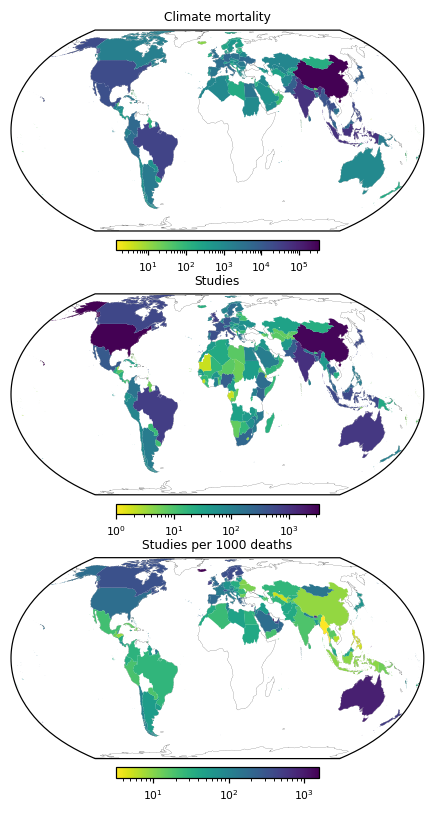

In [389]:
tsize = 8

fig = plt.figure(figsize=(5,9), dpi=110)
gs = fig.add_gridspec(3, 1, figure=fig, wspace=0.1)

mdf = adm0shps.merge(af_mort, left_on='NAME', right_on='country', how='left')
ax = plt.subplot(gs[0], projection=p)
cname = name.split('.')[2]
ax.set_title(f'Climate mortality', fontsize=tsize)
map_countries(mdf, ax, "climate mortality", vmax=mdf['climate mortality'].max(), ctitle='', log=True)

ax = plt.subplot(gs[1], projection=p)
cname = name.split('.')[2]
ax.set_title(f'Studies', fontsize=tsize)
map_countries(mdf, ax, "studies", vmax=mdf['studies'].max(), ctitle='', log=True)


ax = plt.subplot(gs[2], projection=p)
cname = name.split('.')[2]
ax.set_title(f'Studies per 1000 deaths', fontsize=tsize)
map_countries(mdf, ax, "studies per 1000 deaths", vmax=mdf['studies per 1000 deaths'].max(), ctitle='', log=True)

Text(0, 0.5, 'Climat health research')

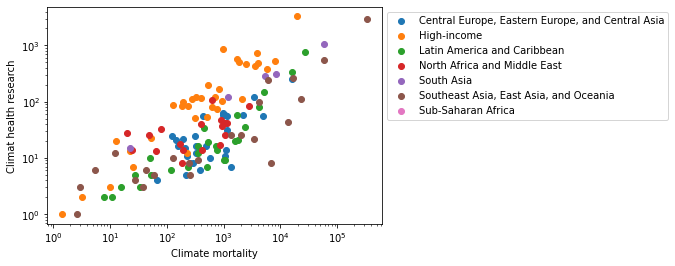

In [395]:
fig, ax = plt.subplots()
for name, group in af_mort.groupby('super-region'):
    ax.scatter(group['climate mortality'], group['studies'], label=name)
    
ax.legend(bbox_to_anchor=(1,1))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Climate mortality')
ax.set_ylabel('Climat health research')

In [299]:
study_totals = {}
study_max = 0
for i, (name, group) in enumerate(totals.groupby('cause_group')):
    sgroup = place_studies[place_studies[name]>=0.5].groupby('country_code3')[['doc_id']].nunique().reset_index()
    study_totals[name] = sgroup
    study_max = max([study_max, sgroup['doc_id'].max()])
study_max

2200

6.300567846194222
7.256839426396453
4.71752004729503


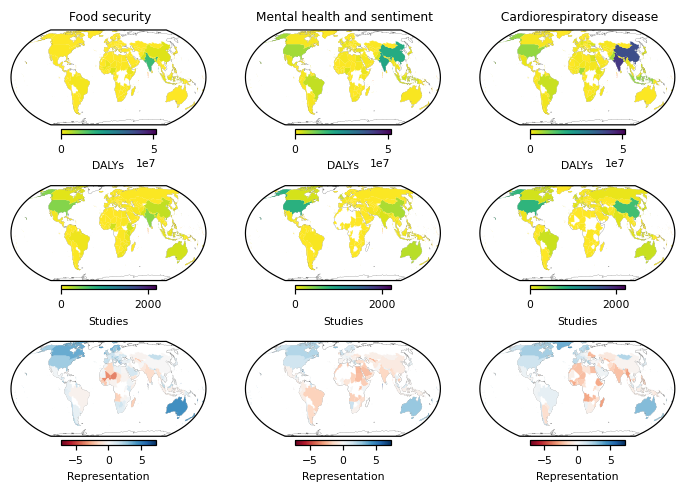

5.540816653026187
6.261080559561982
5.899239168384222


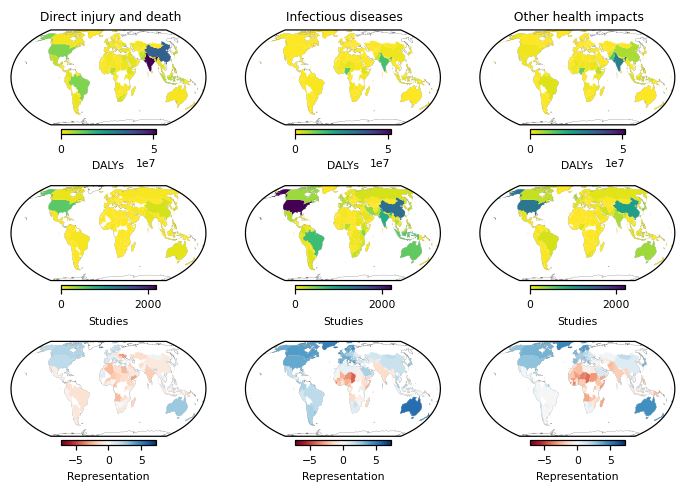

In [15]:
tsize = 8

for i, (name, group) in enumerate(totals.groupby('cause_group')):
    if i%3==0:
        if i>0:
            plt.show()
        fig = plt.figure(figsize=(8,5), dpi=110)
        gs = fig.add_gridspec(3, 3, figure=fig, wspace=0.1, hspace=0.5)
    group['gbd_share'] = group['val'] / group['val'].sum()
    mdf = adm0shps.merge(group, left_on='NAME', right_on='location_name', how='left')
    ax = plt.subplot(gs[0,i%3], projection=p)
    cname = name.split('.')[2]
    ax.set_title(f'{cname}', fontsize=tsize)
    map_countries(mdf, ax, "val", vmax=totals.val.max(), ctitle='DALYs')
    
    s_group = study_totals[name]
    s_group['r_share'] = s_group['doc_id'] / s_group['doc_id'].sum()
    
    
    mdf = mdf.merge(s_group, left_on='ADM0_A3', right_on='country_code3', how='left')
    ax = plt.subplot(gs[1,i%3], projection=p)
    map_countries(mdf, ax, "doc_id", vmax=study_max, ctitle='Studies')
    #ax.set_title(f'Research', fontsize=tsize)
    
    ax = plt.subplot(gs[2,i%3], projection=p)
    mdf['rep'] = np.log(mdf['r_share'] / mdf['gbd_share'])
    y = 'rep'
    ax.coastlines(lw=0.1)

    cmap = colormaps['RdBu']
    ex_val = max([abs(mdf[y].min()), abs(mdf[y].max())])
    print(ex_val)
    ex_val = 7.26
    norm = Normalize(vmin=-ex_val, vmax=ex_val)
    
    colors = [cmap(norm(x)) for x in mdf[y]]
    
    for j, row in mdf.iterrows():

        ax.add_geometries(
            [row.ee_geo],
            color=[cmap(norm(row[y]))],
            crs=ccrs.EqualEarth(),lw=0.1, linestyle=':',ec="black"
        )

    cbar = fig.colorbar(
        ScalarMappable(norm=norm, cmap=cmap), 
        ax=ax, orientation="horizontal",
        fraction=0.046, pad=0.04
    )
    cbar.ax.tick_params(labelsize=tsize-1)
    cbar.set_label('Representation', fontsize=tsize-1)
    
    #ax.set_title(f'Representation', fontsize=tsize)
    
    
    


In [42]:
gbd

,cause_group,location_name,val
1029,3 - 2.06. Other health impacts,Australia,6.694026e+04
1046,3 - 2.06. Other health impacts,Brunei Darussalam,2.655002e+03
1051,3 - 2.06. Other health impacts,Cambodia,3.308929e+05
1057,3 - 2.06. Other health impacts,China,6.474964e+06
1082,3 - 2.06. Other health impacts,Fiji,1.235822e+04
1110,3 - 2.06. Other health impacts,Japan,2.001096e+05
1114,3 - 2.06. Other health impacts,Kiribati,3.060330e+03
1117,3 - 2.06. Other health impacts,Lao People's Democratic Republic,2.124463e+05
1127,3 - 2.06. Other health impacts,Malaysia,1.640719e+05
1131,3 - 2.06. Other health impacts,Marshall Islands,7.528478e+02


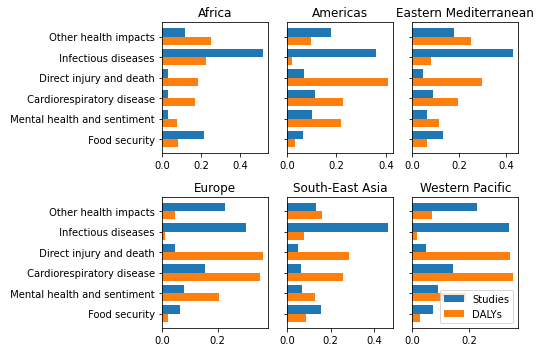

In [57]:
fig, axs = plt.subplots(2,3, sharey=True, figsize=(7.4,5))
axs = axs.flatten()
for i, (name, group) in enumerate(place_studies.groupby('WHO Region')):
    gbd_group = totals[totals['location_name'].isin(group['Country Name to use'])]
    ax = axs[i]
    ax.set_title(name)
    ylabs = []
    for j, (impact, gbd) in enumerate(gbd_group.groupby('cause_group')):
        impact_share = group[group[impact]>=0.5]['id'].nunique() / group['doc_id'].nunique()
        burden_share = gbd['val'].sum() / gbd_group['val'].sum()
        ax.barh(j+0.2, impact_share, height=0.4, color='C0', label='Studies' if j==0 else None)
        ax.barh(j-0.2, burden_share, height=0.4, color='C1', label='DALYs' if j==0 else None)
        ylabs.append(impact.split('.')[2])
    
    ax.set_yticks(range(len(ylabs)))
    
    if i%3 == 0:
        
        ax.set_yticklabels(ylabs)
    
        
ax.legend()
fig.tight_layout()

In [125]:
groupings

,Country Name to use,ISO3,LC Grouping,HDI Level (2021),WHO Region
0,Aruba,ABW,SIDS,NaN,Americas
1,Afghanistan,AFG,Asia,Low,Eastern Mediterranean
2,Angola,AGO,Africa,Medium,Africa
3,Anguilla,AIA,SIDS,NaN,Americas
4,Albania,ALB,Europe,High,Europe
...,...,...,...,...,...
217,Samoa,WSM,SIDS,High,Western Pacific
218,Yemen,YEM,Asia,Low,Eastern Mediterranean
219,South Africa,ZAF,Africa,High,Africa
220,Zambia,ZMB,Africa,Medium,Africa


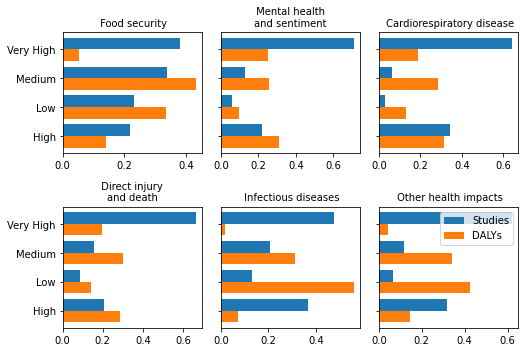

In [126]:
fig, axs = plt.subplots(2,3, sharey=True, figsize=(7.4,5))
axs = axs.flatten()
for i, (impact, gbd_group) in enumerate(totals.groupby('cause_group')):
    s_group = place_studies[place_studies[impact]>=0.5]
    ax = axs[i]
    ax.set_title(impact.split('.')[2].replace('and','\nand'), fontsize=10)
    ylabs = []
    for j, (region, studies) in enumerate(s_group.groupby('HDI Level (2021)')):
        #res_share = group[group[impact]>=0.5]['id'].nunique() / s_group['doc_id'].nunique()
        res_share = studies['id'].nunique() / s_group['id'].nunique()
        burden_share = gbd_group[gbd_group['location_name'].isin(studies['Country Name to use'])]['val'].sum() / gbd_group['val'].sum()
        #burden_share = gbd['val'].sum() / gbd_group['val'].sum()
        ax.barh(j+0.2, res_share, height=0.4, color='C0', label='Studies' if j==0 else None)
        ax.barh(j-0.2, burden_share, height=0.4, color='C1', label='DALYs' if j==0 else None)
        ylabs.append(region)
    
    ax.set_yticks(range(len(ylabs)))
    
    if i%3 == 0:
        
        ax.set_yticklabels(ylabs)
    
        
ax.legend()
fig.tight_layout()

In [69]:
impacts

['3 - 2.01. Food security',
 '3 - 2.02. Mental health and sentiment',
 '3 - 2.03. Cardiorespiratory disease',
 '3 - 2.04. Direct injury and death',
 '3 - 2.05. Infectious diseases',
 '3 - 2.06. Other health impacts',
 '3 - 2.07. Water security',
 '3 - 2.08. Mortality and morbidity',
 '3 - 2.09. Health system capacity']

In [72]:
place_studies[
    (place_studies['WHO Region']=='Americas') & 
    (place_studies['3 - 2.01. Food security']>=0.5)
].drop_duplicates('id')[['title','abstract']].head().values

array([['Estimated Global Disease Burden From US Health Care Sector Greenhouse Gas Emissions',
        'Objectives. To quantify the increased disease burden caused by US health care sector life cycle greenhouse gas (GHG) emissions of 614 million metric tons of carbon dioxide equivalents in 2013. Methods. We screened for health damage factors that linked GHG emissions to disease burdens. We selected 5 factors, based on appropriate temporal modeling scales, which reflect a range of possible GHG emissions scenarios. We applied these factors to health care sector emissions. Results. We projected that annual GHG emissions associated with health care in the United States would cause 123 000 to 381 000 disability-adjusted life-years in future health damages, with malnutrition being the largest damage category. Conclusions. Through their contribution to global climate change, GHG emissions will negatively affect public health because of an increased prevalence of extreme weather, flooding, vec

In [81]:
totals = tot

,cause_group,location_name,val
0,3 - 2.01. Food security,Afghanistan,2.690090e+05
1,3 - 2.01. Food security,Albania,6.761740e+03
2,3 - 2.01. Food security,Algeria,1.131052e+05
3,3 - 2.01. Food security,American Samoa,2.407620e+02
4,3 - 2.01. Food security,Andorra,8.059065e+01
...,...,...,...
1219,3 - 2.06. Other health impacts,Venezuela (Bolivarian Republic of),3.385855e+05
1220,3 - 2.06. Other health impacts,Viet Nam,6.672530e+05
1221,3 - 2.06. Other health impacts,Yemen,1.399994e+06
1222,3 - 2.06. Other health impacts,Zambia,6.352181e+05


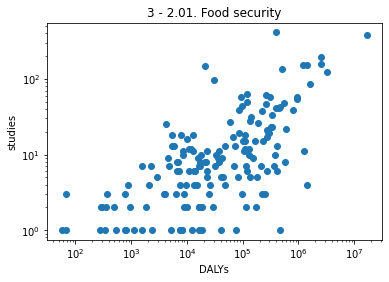

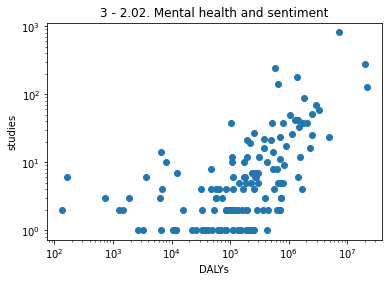

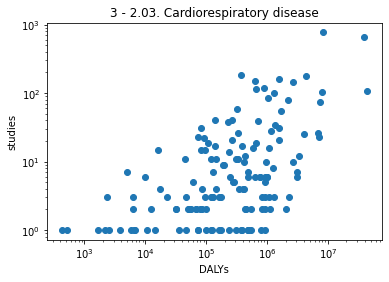

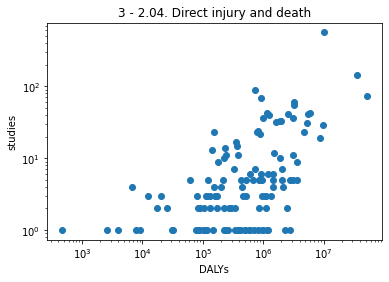

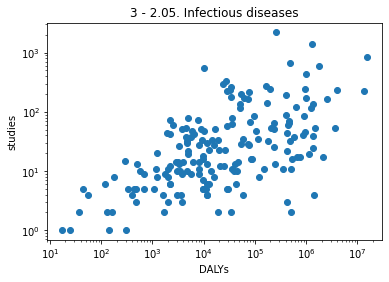

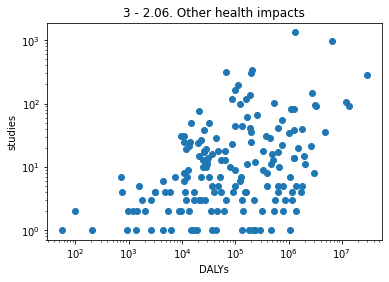

In [97]:
for impact in impacts:

    m = place_studies[place_studies[impact]>=0.5].groupby('ISO3')['doc_id'].nunique().to_frame('n_studies').reset_index()
    m = m.merge(totals[totals['cause_group']==impact])
    if m.shape[0]==0:
        continue
    fig, ax = plt.subplots()
    ax.scatter(m['val'], m['n_studies'], )
    ax.set_ylabel('studies')
    ax.set_xlabel('DALYs')
    ax.set_title(impact)
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    plt.show()

In [119]:
wb = pd.read_csv('data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_5607117.csv', skiprows=4)
wb

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.112502e+10,2.161623e+10,2.350628e+10,2.804836e+10,2.592067e+10,2.947210e+10,...,1.006526e+12,9.273485e+11,8.851764e+11,1.021043e+12,1.007196e+12,1.000834e+12,9.275933e+11,1.081998e+12,1.169484e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.044764e+10,1.117321e+10,1.199053e+10,1.272769e+10,1.389811e+10,1.492979e+10,...,8.943225e+11,7.686447e+11,6.913634e+11,6.848988e+11,7.670257e+11,8.225384e+11,7.864600e+11,8.444597e+11,8.778633e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.067136e+11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.074393e+09,6.295845e+09,6.682674e+09,7.180769e+09,7.878763e+09,7.899741e+09,7.717143e+09,9.412034e+09,9.429156e+09,NaN
262,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.322859e+10,4.244449e+10,3.131782e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,...,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.041589e+11,3.885312e+11,3.376196e+11,4.190156e+11,4.058697e+11,NaN
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631151e+10,2.330867e+10,1.811064e+10,2.214765e+10,2.978445e+10,NaN


In [124]:
wb_data = pd.concat([
    pd.read_csv('data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_5607117.csv', skiprows=4),
    pd.read_csv('data/API_SP.POP.TOTL_DS2_en_csv_v2_5607187.csv', skiprows=4)
]).rename(columns={'2021': 'value'})[['Country Code','Indicator Name','value']].pivot(
    index='Country Code', columns='
)
wb_data

,Country Code,Indicator Name,value
0,ABW,GDP (current US$),3.126019e+09
1,AFE,GDP (current US$),1.081998e+12
2,AFG,GDP (current US$),1.458314e+10
3,AFW,GDP (current US$),8.444597e+11
4,AGO,GDP (current US$),6.568544e+10
...,...,...,...
261,XKX,"Population, total",1.786038e+06
262,YEM,"Population, total",3.298164e+07
263,ZAF,"Population, total",5.939226e+07
264,ZMB,"Population, total",1.947312e+07


In [116]:
import statsmodels.api as sm

for impact in impacts:
    
    t = totals[totals['cause_group']==impact]
    if t.shape[0]==0:
        continue

    m = place_studies[place_studies[impact]>=0.5].groupby('ISO3')['doc_id'].nunique().to_frame('n_studies').reset_index()
    m = m.merge(t)


    print(impact)
    X = m[['val']]
    y = m['n_studies']

    mod = sm.OLS(y, X)

    res = mod.fit()

    print(res.summary())

3 - 2.01. Food security
                                 OLS Regression Results                                
Dep. Variable:              n_studies   R-squared (uncentered):                   0.449
Model:                            OLS   Adj. R-squared (uncentered):              0.445
Method:                 Least Squares   F-statistic:                              132.7
Date:                Thu, 13 Jul 2023   Prob (F-statistic):                    7.57e-23
Time:                        17:55:19   Log-Likelihood:                         -850.04
No. Observations:                 164   AIC:                                      1702.
Df Residuals:                     163   BIC:                                      1705.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [68]:
groupings[groupings['WHO Region']=='Western Pacific']

,Country Name to use,ISO3,LC Grouping,HDI Level (2021),WHO Region
9,American Samoa (USA),ASM,SIDS,NaN,Western Pacific
11,Australia,AUS,Oceania,Very High,Western Pacific
29,Brunei Darussalam,BRN,Asia,Very High,Western Pacific
36,China,CHN,Asia,High,Western Pacific
41,Cook Islands,COK,SIDS,NaN,Western Pacific
42,Cook Islands,COK,SIDS,NaN,Western Pacific
65,Fiji,FJI,SIDS,High,Western Pacific
67,Federated States of Micronesia,FSM,SIDS,Medium,Western Pacific
81,Guam (USA),GUM,SIDS,NaN,Western Pacific
83,Hong Kong SAR (China),HKG,Asia,NaN,Western Pacific
